미니배치 경사하강법

In [1]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv_data')
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()#타깃값과 인풋값 설정, 데이터 준비

In [2]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)
#데이터 나누기

In [3]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)
#데이터 표준점수로 전처리

In [5]:
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log_loss',max_iter=10,random_state=42)#10에포크 손실함수=log
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target)," ",sc.score(test_scaled,test_target))
#모델 학습과 점수 출력

0.773109243697479   0.775


c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [6]:
sc.partial_fit(train_scaled,train_target)#추가로 학습(1에포크)
print(sc.score(train_scaled,train_target)," ",sc.score(test_scaled,test_target))

0.8151260504201681   0.85


In [8]:
sc.partial_fit(test_scaled,test_target)
print(sc.score(train_scaled,train_target)," ",sc.score(test_scaled,test_target))
#다른 데이터도 추가로 학습가능

0.8235294117647058   0.9


적절한 max iter값 찾기

In [16]:
import numpy as np
s=[]
ts=[]
sc=SGDClassifier(loss='log_loss')
classes=np.unique(train_target)
for i in range(1,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    s.append(sc.score(train_scaled,train_target))
    ts.append(sc.score(test_scaled,test_target))


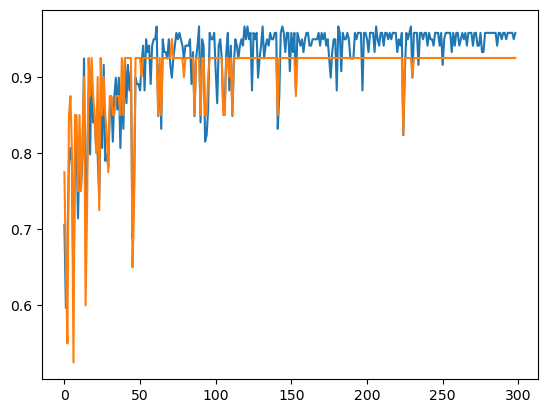

In [17]:
import matplotlib.pyplot as plt
plt.plot(s)
plt.plot(ts)
plt.show()